In [1]:

# Example Material Source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import math


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)


##one hot encoding
train_labels = np_utils.to_categorical(train_labels,10)
test_labels = np_utils.to_categorical(test_labels,10)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
##train_images, test_images = preProcess(train_images), preProcess(test_images)
##train_images, test_images = contrastCurve(train_images), contrastCurve(test_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
## Transforming images to get a larger test set

data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
    input_shape=(32,32,3)),
    layers.experimental.preprocessing.RandomRotation(0.09),
    layers.experimental.preprocessing.RandomZoom(0.05),
    ##layers.experimental.preprocessing.RandomContrast(0.1),
  ]
)

In [7]:
##tf.keras.layers.Conv2D(
##    filters, kernel_size, strides=(1, 1), padding='valid',
##    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
##    use_bias=True, kernel_initializer='glorot_uniform',
##    bias_initializer='zeros', kernel_regularizer=None,
##    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
##    bias_constraint=None, **kwargs
##)

"""
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) ## 4,4 gets 71%
model.add(layers.MaxPooling2D((3, 3)))

## This above model generates a result of 0.7159000039100647

"""

"""
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same"))
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(32, 32, 3),padding="same"))
model.add(layers.MaxPooling2D((5, 5),padding = "same"))
model.add(layers.Conv2D(64, (2, 2), activation='relu',padding ="same"))
model.add(layers.Conv2D(64, (6, 6), activation='relu',padding = "same")) ## 4,4 gets 71%
model.add(layers.MaxPooling2D((2, 2),padding = "same"))
"""

# 3,4,4 0.7516999840736389
"""
##Breaks 90% but over fits too much
model = models.Sequential()
##model.add(data_augmentation)

model.add(layers.Conv2D(64,2,activation='relu', input_shape=(32, 32, 3),padding="same"))
##model.add(layers.Conv2D(64,3,activation='relu',padding="same"))
model.add(layers.Dropout(0.15))

model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256,3,activation = "relu",padding = "same"))
model.add(layers.Dropout(0.15))
##model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256,3,activation = "relu",padding = "same"))
model.add(layers.Dropout(0.15))

"""
network_scale = 0.75
model = models.Sequential()
model.add(data_augmentation)

model.add(layers.Conv2D(int(64*network_scale),3,activation='relu',padding = "same", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(int(128*network_scale),3,activation='relu',padding = "same", input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(int(128*network_scale),3,activation = "relu",padding = "same"))
model.add(layers.Conv2D(int(256*network_scale),3,activation = "relu",padding = "same"))
model.add(layers.Dropout(0.2))

model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(int(512*network_scale),3,activation = "relu",padding = "same"))
model.add(layers.Conv2D(int(1024*network_scale),3,activation = "relu",padding = "same"))
model.add(layers.Conv2D(int(1536*network_scale),3,activation = "relu",padding = "same"))
model.add(layers.Dropout(0.25))



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 192)      

In [9]:
stage2_scale = 1
model.add(layers.Flatten())
model.add(layers.Dense(int(1024*stage2_scale), activation='relu'))
model.add(layers.Dense(int(1024*stage2_scale), activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(int(512*stage2_scale),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation="softmax"))
##Adding dropout to reduice overfitting
#model.add(layers.Dropout(0.15))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 192)      

In [10]:
##model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.compile(optimizer='adam',
              loss= "categorical_crossentropy",
              metrics=['accuracy'])
             

history = model.fit(train_images, train_labels,batch_size=250,  epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
200/200 [==============================] - 61s 258ms/step - loss: 2.3177 - accuracy: 0.1338 - val_loss: 1.6956 - val_accuracy: 0.3620
Epoch 2/100
200/200 [==============================] - 51s 257ms/step - loss: 1.6900 - accuracy: 0.3710 - val_loss: 1.3590 - val_accuracy: 0.5035
Epoch 3/100
200/200 [==============================] - 52s 258ms/step - loss: 1.4298 - accuracy: 0.4789 - val_loss: 1.2403 - val_accuracy: 0.5420
Epoch 4/100
200/200 [==============================] - 51s 257ms/step - loss: 1.2795 - accuracy: 0.5443 - val_loss: 1.2013 - val_accuracy: 0.5674
Epoch 5/100
200/200 [==============================] - 51s 257ms/step - loss: 1.1739 - accuracy: 0.5859 - val_loss: 1.0791 - val_accuracy: 0.6101
Epoch 6/100
200/200 [==============================] - 51s 257ms/step - loss: 1.1042 - accuracy: 0.6113 - val_loss: 0.9372 - val_accuracy: 0.6670
Epoch 7/100
200/200 [==============================] - 51s 257ms/step - loss: 1.0134 - accuracy: 0.6435 - val_loss: 0.9668 -

313/313 - 7s - loss: 0.6113 - accuracy: 0.8252


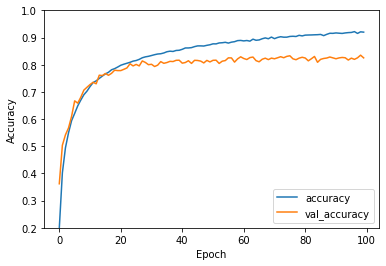

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.8252000212669373


In [13]:
print(history.history['accuracy'])

[0.25266000628471375, 0.4457400143146515, 0.5361199975013733, 0.5998200178146362, 0.643779993057251, 0.6831200122833252, 0.707099974155426, 0.7286199927330017, 0.7439200282096863, 0.7574399709701538, 0.7708799839019775, 0.7815600037574768, 0.7926999926567078, 0.7988600134849548, 0.8072400093078613, 0.8120999932289124, 0.8206200003623962, 0.8245999813079834, 0.8306199908256531, 0.8341799974441528, 0.8399800062179565, 0.844760000705719, 0.8507400155067444, 0.8512600064277649, 0.8576200008392334, 0.8605999946594238, 0.8622400164604187, 0.8662199974060059, 0.8691400289535522, 0.8704400062561035, 0.8755599856376648, 0.8738999962806702, 0.8790000081062317, 0.8813599944114685, 0.8852199912071228, 0.8893399834632874, 0.8872600197792053, 0.8920199871063232, 0.8938800096511841, 0.8950999975204468, 0.8970400094985962, 0.8995199799537659, 0.8972399830818176, 0.9046000242233276, 0.9017999768257141, 0.9046599864959717, 0.9079200029373169, 0.9100599884986877, 0.9123200178146362, 0.9112600088119507, 0